# Image Classification of Cifar10 dataset

In this assignment, we will train several image classification models using the [CIFAR-10 dataset](https://keras.io/api/datasets/cifar10/). The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The training images contain exactly 5000 images from each class and the test images contain exactly 1000 randomly-selected images from each class.

# Important Notes
* requirements:
  * python 3.6
  * tensorflow 2.0.0 (or tensorflow-gpu 2.0.0), h5py 2.10.0, scipy >= 1.5.4, pandas 1.1.5, numpy 1.19, matplotlib
  * to install a package like tensorflow with specific version 2.0.0, use <strong> pip3 install tensorflow==2.0.0 </strong>
* You are suggested to execute code we provided in order. You can add cells to do experiments, but <strong>DO NOT change code we provided unless it is a function that you need to complete</strong>. In each graded function cell, you should replace "raise NotImplementedError()" under "# YOUR CODE HERE" by your own answer. For some graded functions, we have already provided some test cases for you. Passing these test cases will guarantee that you can at least get some scores. We have some hidden tests. So passing all tests in this notebook doesn't mean you can get all scores. <strong> Do Not Delete any cell we provided, it may lead to scroing error for some hidden test cases. </strong> If you accidently deleted some graded function cells or test cells, you should download this assignment again. <strong> Adding a new cell and pasting deleted content won't work in this case. </strong>
* Only funtions specified in the Graded Function part will be graded. Other parts will be ignored during grading.
* <strong> Rename this ps1.ipynb file as <your_hku_student_id>.ipynb to submit </strong>. For example, if your student id is 1234567890, then your should rename ps1.ipynb as 1234567890.ipynb.
* GPU is not required. But if you want to run the training code faster, you can use GPU. [How to use HKU GPU](https://www.cs.hku.hk/gpu-farm/home). Another option is to use [google colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true).

# Sections
* [Data Process](#dp)
* [MLP Classifier](#mlp)
* [CNN Classifier](#cnn)
* [Transfer Learning](#tl)
* [Data Augmentation](#da)

In [2]:
### import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import scipy

%matplotlib inline

<a name='dp'></a>
# 1. Data Process

## Graded Function:
Complete the load_data function below. You should:
* load cifar10 dataset using the tf.keras.datasets api (check [this link](https://keras.io/api/datasets/cifar10/))
* rescale pixel values of x_train, x_test to range \[0,1\] by dividing them by 255.0 
* reshape y_train, y_test to shape (-1,)
* return the dataset in this format: (x_train, y_train), (x_test, y_test)

In [3]:
def load_data():
    """load cifar10 dataset using the tf.keras.datasets api and 
    return the loaded data as two tuples: (x_train, y_train), (x_test, y_test)
    """
    # YOUR CODE HERE
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train = np.asarray(x_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    x_test = np.asarray(x_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()


    # Normalize the data: subtract the mean pixel and divide by std
    mean_pixel = x_train.mean(axis=(0, 1, 2), keepdims=True)
    std_pixel = x_train.std(axis=(0, 1, 2), keepdims=True)
    x_train = (x_train - mean_pixel) / std_pixel
    x_test = (x_test - mean_pixel) / std_pixel

    return (x_train, y_train), (x_test, y_test)

In [4]:
(test_x_train, test_y_train), (test_x_test, test_y_test) = load_data()
assert test_x_train.shape == (50000, 32, 32, 3)
assert test_y_train.shape == (50000,)
assert test_x_test.shape == (10000, 32, 32, 3)
assert test_y_test.shape == (10000,)

In [5]:
# this cell contains a hiddent test, don't delete this cell

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


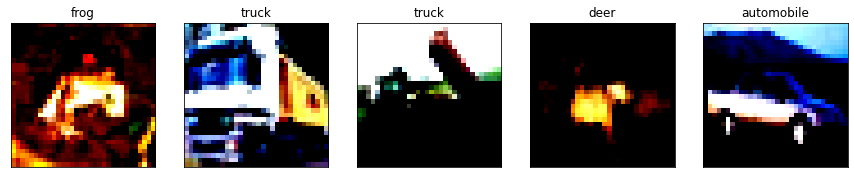

In [6]:
# load the data using load_data function
(x_train, y_train), (x_test, y_test) = load_data()

# show the first five train images and its label
classes = ["airplane","automobile", "bird", "cat", "deer",
          "dog", "frog", "horse", "ship", "truck"]
fig, axs = plt.subplots(1,5, figsize=(15,15))
for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].set_title(classes[y_train[i]])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

# Graded Function:
You will complete the create_dataset function below. This function will take five arguments (images, labels, batch_size, buffer_size, seed). Later on you will pass in (x_train, y_train, augment_map) and (x_test, y_test, augment_map) to create datasets. You should create a dataset with the following steps:
* first create a tf.data.Dataset object using tf.data.Dataset.from_tensor_slices method. Each element of the resulting dataset should be a tuple (image, label)
* batch the dataset with batch size set to the batch_size argument
* shuffle the dataset with shuffle buffer size set to buffer_size argument, shuffle seed set to seed argument and set reshuffle_each_iteration to False
* return the dataset you created

In [7]:
def create_dataset(images, labels, batch_size, buffer_size=10_000, seed=None):
    # YOUR CODE HERE
    dataset = tf.data.Dataset.from_tensor_slices((images, labels)).shuffle(10000,seed,False).batch(batch_size)
    return dataset

In [8]:
(test_x_train, test_y_train), (test_x_test, test_y_test) = cifar10.load_data()
dataset_1 = create_dataset(test_x_test, test_y_test, batch_size=32, seed=200)
assert isinstance(dataset_1, tf.data.Dataset)
example = next(iter(dataset_1))
example_2 = next(iter(dataset_1))
assert example[0].shape == (32,32,32,3)
assert example[1].shape == (32,1)
assert example_2[0].shape == (32,32,32,3)
assert example_2[1].shape == (32,1)
del test_x_train
del test_y_train
del test_x_test
del test_y_test

In [9]:
# this cell contains a hiddent test, don't delete this cell

In [10]:
# create train and test datasets
train_dataset = create_dataset(x_train, y_train, batch_size=32)
test_dataset = create_dataset(x_test, y_test, batch_size=32)
print(train_dataset.element_spec)
print(test_dataset.element_spec)

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


<a name='mlp'></a>
# Graded Function:
## 2. MLP neural network classifier
Complete the build_mlp_model function below. The following requirements must be satisfied:
* Build a MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* the paramter units is a list of integers and input_shape is a list or a tuple of integers.
* you should use the tf.keras.models.Sequential api.
* the first layer is a Flatten layer, you should set the input shape of this layer to the input_shape parameter of the function
* the first layer is followed by len(units) dense layers. Intergers in the units list specify the number of units in these Dense layers (one by one). All these layers have ReLU activation function
* then a final Dense layer is followed. This final dense layer has 10 units. A softmax activation function is used in this layer.
* return the model

In [21]:
def build_mlp_model(units, input_shape):
    model = Sequential()
    # YOUR CODE HERE
    model.add(Flatten(input_shape=input_shape))
    for unit in units:
        model.add(Dense(unit, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [22]:
test_units = [32]
test_shape = [16, 16]
test_model = build_mlp_model(test_units, test_shape)
assert isinstance(test_model, tf.keras.models.Model)
assert len(test_model.layers) == len(test_units) + 2
assert test_model.layers[0].input_shape == (None, 16, 16)
assert isinstance(test_model.layers[0], Flatten)
config = test_model.layers[1].get_config()
assert isinstance(test_model.layers[1], Dense)
assert config['activation'] == 'relu'
assert config['units'] == test_units[0]
assert isinstance(test_model.layers[-1], Dense)
config = test_model.layers[-1].get_config()
assert isinstance(test_model.layers[-1], Dense)
assert config['activation'] == 'softmax'
assert config['units'] == 10
del test_model

In [23]:
# this cell contains a hiddent test, don't delete this cell

In [24]:
# create model and print out the model summary
# units = [64,32]
units = [64,32, 32]
mlp_model = build_mlp_model(units, x_train.shape[1:])
mlp_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 200,138
Trainable params: 200,138
Non-trainable params: 0
_________________________________________________________________


# Graded Function:
Complete the compile_model function below. Complie the model using the compile method of tf.keras.Model class:
* use the adam optimizer with default parameters
* use the sparse categorical crossentropy loss
* use only the accuracy metric
* this function shouldn't return anything (the model passed in will keep all the settings you compiled in this function)

In [12]:
def compile_model(model):
    # YOUR CODE HERE
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [26]:
# compile the multi layer perceptron model
compile_model(mlp_model)

In [27]:
test_model = Sequential([Dense(100),
                        Dense(2, activation='softmax')])
compile_model(test_model)
assert isinstance(test_model.optimizer, tf.keras.optimizers.Adam)
assert hasattr(test_model, 'loss')
assert test_model.loss == 'sparse_categorical_crossentropy'
assert ['accuracy'] == test_model._compile_metrics
del test_model

In [28]:
# train mlp model
early_stop = EarlyStopping(patience=5, monitor='val_accuracy')
history = mlp_model.fit(train_dataset, epochs=30, validation_data=test_dataset, callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7822 - accuracy: 0.3702 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5843 - accuracy: 0.4396 - val_loss: 1.5534 - val_accuracy: 0.4448
Epoch 3/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4905 - accuracy: 0.4727 - val_loss: 1.5352 - val_accuracy: 0.4570
Epoch 4/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4295 - accuracy: 0.4937 - val_loss: 1.5091 - val_accuracy: 0.4635
Epoch 5/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3766 - accuracy: 0.5126 - val_loss: 1.5053 - val_accuracy: 0.4765
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3366 - accuracy: 0.5254 - val_loss: 1.4866 - val_accuracy: 0.4755
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3017 - accuracy: 0.5359 - val_loss: 1.4943

In [29]:
# create loss, accuracy dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.782276,0.37016,1.628973,0.4199
1,1.584303,0.43960,1.553438,0.4448
2,1.490455,0.47272,1.535202,0.4570
3,1.429374,0.49370,1.509146,0.4635
4,1.376463,0.51262,1.505323,0.4765


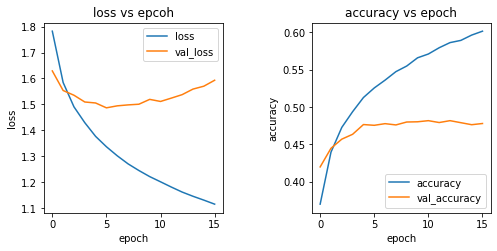

In [30]:
# plot loss and accuracy against epoch
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5))
df.plot(y=['loss', 'val_loss'], ax=axes[0], title='loss vs epcoh')
df.plot(y=['accuracy', 'val_accuracy'], ax=axes[1], title='accuracy vs epoch')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.subplots_adjust(wspace=0.5)

In [31]:
# evaluate the model on the test set
mlp_model.evaluate(test_dataset, verbose=2)

313/313 - 1s - loss: 1.5930 - accuracy: 0.4779


[1.5930280555932286, 0.4779]

<a name='cnn'></a>
# Graded Function:
## 3. CNN neural network classifier
Complete the build_cnn_model below using the Sequential API. You should:
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* the first layer is a Conv2D layer with 16 filters, (3,3) kernel size, ReLU activation, 'SAME' padding, and input_shape set to be input_shape parameter of the function
* then a MaxPool2D layer with pool size (2,2)
* then a Dropout layer with drop out rate set to be dropout_rate parameter of the function
* then a Conv2D layer with 8 filters, (3,3) kernel size, ReLU activation, 'SAME' padding
* then a MaxPool2D layer with pool size (2,2)
* then a Dropout layer with drop out rate set to be dropout_rate parameter of the function
* then a Flatten layer
* then a Dense layer with 64 units and ReLU activation
* then a BatchNormalization layer
* then a Dropout layer with drop out rate set to be dropout_rate parameter of the function
* then a Dense layer with 32 units and ReLU activation
* then a BatchNormalization layer
* then a Dropout layer with drop out rate set to be dropout_rate parameter of the function
* then a final dense layer with 10 units and softmax activation function
* return the model

In [12]:
def build_cnn_model(input_shape, dropout_rate):
    model = Sequential()
    # YOUR CODE HERE
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='SAME', input_shape = input_shape))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='SAME'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model


In [13]:
test_model = build_cnn_model((8,8, 1), 0.1)
assert isinstance(test_model, tf.keras.models.Model)
assert len(test_model.layers) == 14
layer_num = 0
assert isinstance(test_model.layers[layer_num], Conv2D)
config = test_model.layers[layer_num].get_config()
assert config['filters'] == 16
assert config['kernel_size'] == (3,3)
assert config['padding'] == 'same'
assert config['batch_input_shape'] == (None, 8, 8, 1)
assert config['activation'] == 'relu'
del test_model

In [14]:
# this cell contains a hiddent test, don't delete this cell

In [15]:
# create cnn model and view summary
cnn_model = build_cnn_model(x_train.shape[1:], 0.1)
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [16]:
# compile and training model
compile_model(cnn_model)
early_stop = EarlyStopping(patience=4, monitor='val_accuracy')
cnn_history = cnn_model.fit(train_dataset, epochs=30, validation_data=test_dataset, callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6692 - accuracy: 0.3979 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3414 - accuracy: 0.5153 - val_loss: 1.2225 - val_accuracy: 0.5633
Epoch 3/30
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2478 - accuracy: 0.5555 - val_loss: 1.1135 - val_accuracy: 0.6115
Epoch 4/30
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1905 - accuracy: 0.5774 - val_loss: 1.0867 - val_accuracy: 0.6126
Epoch 5/30
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1485 - accuracy: 0.5906 - val_loss: 1.0356 - val_accuracy: 0.6341
Epoch 6/30
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1117 - accuracy: 0.6056 - val_loss: 1.0263 - val_accuracy: 0.6377
Epoch 7/30
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0896 - accuracy: 0.6173 - val_loss: 

In [17]:
df = pd.DataFrame(cnn_history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.669250,0.39786,1.357234,0.5148
1,1.341358,0.51526,1.222538,0.5633
2,1.247938,0.55550,1.113497,0.6115
3,1.190452,0.57742,1.086730,0.6126
4,1.148587,0.59062,1.035557,0.6341


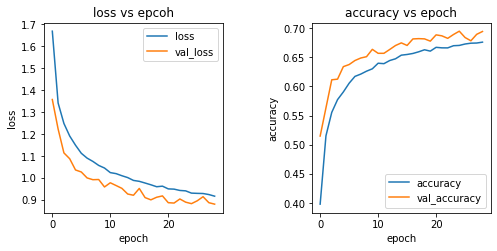

In [18]:
# plot loss and accuracy against epoch
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5))
df.plot(y=['loss', 'val_loss'], ax=axes[0], title='loss vs epcoh')
df.plot(y=['accuracy', 'val_accuracy'], ax=axes[1], title='accuracy vs epoch')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.subplots_adjust(wspace=0.5)

In [19]:
# evaluate the model on the test set
cnn_model.evaluate(test_dataset, verbose=2)

313/313 - 3s - loss: 0.8794 - accuracy: 0.6945


[0.8794148093976152, 0.6945]

We can see that our cnn model improved the accuracy a lot even though our cnn model has much less parameters than the mlp model. Model architecture really matters in Deep Learning!

# Model Predicitons

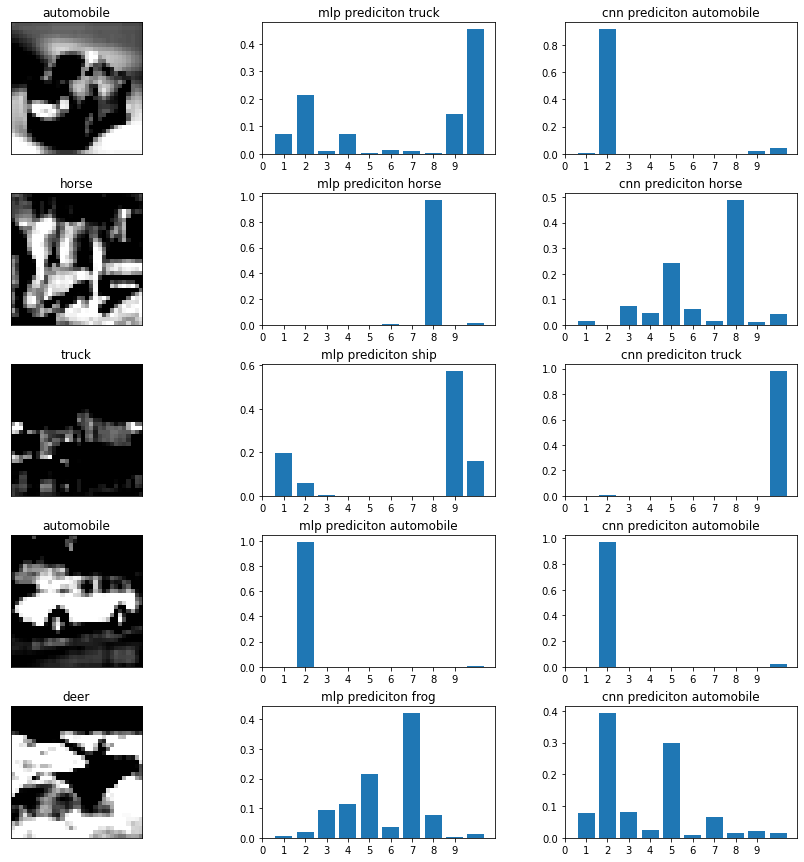

In [32]:
# mlp and cnn predictions
rand_idx = np.random.choice(range(x_test.shape[0]), size=5)
fig, axs = plt.subplots(5, 3,figsize=(15,15))
for i in range(5):
    axs[i][0].imshow(x_test[rand_idx[i], :, :, 0], cmap='gray', vmin=0, vmax=1)
    axs[i][0].set_title(classes[y_test[rand_idx[i]]])
    axs[i][0].set_xticks([]) 
    axs[i][0].set_yticks([]) 
    probs = mlp_model.predict(x_test[rand_idx[i]][np.newaxis, ...])[0]
    prediction = np.argmax(probs)
    axs[i][1].bar(range(1,11), probs)
    axs[i][1].set_xticks([i for i in range(0, 10)]) 
    axs[i][1].set_title('mlp prediciton {}'.format(classes[prediction]))
    probs = cnn_model.predict(x_test[rand_idx[i]][np.newaxis, ...])[0]
    prediction = np.argmax(probs)
    axs[i][2].bar(range(1,11), probs)
    axs[i][2].set_xticks([i for i in range(0, 10)]) 
    axs[i][2].set_title('cnn prediciton {}'.format(classes[prediction]))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

<a name='tl'></a>
## Transfer Learning
Transfer learning is very popular and powerful in computer vision. When you don't have too much data and you still want to a good model, you may resort to transfer learning.
We will use the pre-trained MobileNet V2 model, available to download from [Keras Applications](https://keras.io/applications/#mobilenetv2).
We will remove the final layer of the network and replace it with new, untrained classifier layers for our task.

In [3]:
# get the body of EfficiekerasNetB1
def get_ENB1_body():
    pretrained_model = tf.keras.applications.MobileNetV2(include_top=False,
                                                            weights='imagenet',
                                                            input_shape=(160,160,3),
                                                            pooling='max')
    transfer_layer = pretrained_model
    return transfer_layer

In [4]:
efficient_net_b1_body = get_ENB1_body()
efficient_net_b1_body.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [5]:
def transfered_model(pretrained_model):
    model = Sequential()
    model.add(pretrained_model)
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    return model

In [6]:
tran_model = transfered_model(efficient_net_b1_body)

In [7]:
tran_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1280)              5120      
_________________________________________________________________
dense (Dense)                (None, 256)               327936    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

In [8]:
# free ENB1 weights
tran_model.layers[0].trainable = False

In [9]:
# resize image to the input of ENB1
def preprocess_for_transfer(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = tf.image.resize_with_pad(image, 160, 160)
    return image, label

def create_transfer_dataset(x,y):
    dataset = tf.data.Dataset.from_tensor_slices((x,y))
    dataset = dataset.map(preprocess_for_transfer)
    dataset = dataset.batch(128)
    dataset = dataset.prefetch(256)
    return dataset

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
train_dataset_resized = create_transfer_dataset(x_train, y_train)
test_dataset_resized = create_transfer_dataset(x_test, y_test)

In [13]:
# compile model
compile_model(tran_model)

In [ ]:
# train model
early_stop = EarlyStopping(patience=4, monitor='val_accuracy')
tran_history = tran_model.fit(train_dataset_resized, epochs=30, validation_data=test_dataset_resized, callbacks=[early_stop])

In [ ]:
df = pd.DataFrame(tran_history.history)
df.head()

In [ ]:
# plot loss and accuracy against epoch
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5))
df.plot(y=['loss', 'val_loss'], ax=axes[0], title='loss vs epcoh')
df.plot(y=['accuracy', 'val_accuracy'], ax=axes[1], title='accuracy vs epoch')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.subplots_adjust(wspace=0.5)

In [ ]:
# evaluate the model on the test set
tran_model.evaluate(test_dataset_resized, verbose=2)

By using transfer learning, we pushed the accuracy to over 70%! Note that now the state of the art benchmark accuracy on this task is [99.70%](https://paperswithcode.com/sota/image-classification-on-cifar-10).

<a name='da'></a>
# Graded Function
## Data Augmentation
Complete the create_image_generator function below. You should:
* create an ImageDataGenerator instance
* initialize the ImageDataGenerator instance with: horizontal_flip=True, vertical_flip=True, rotation_range=180, rescale=1/255.0
* return this ImageDataGenerator instance

In [11]:
def create_image_generator():
    # YOUR CODE HERE
    imageData = ImageDataGenerator(rescale = 1.0/255.0, horizontal_flip=True, vertical_flip=True, rotation_range=180)
    return imageData

In [12]:
# this cell contains a hiddent test, don't delete this cell

In [13]:
img_gen = create_image_generator()

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

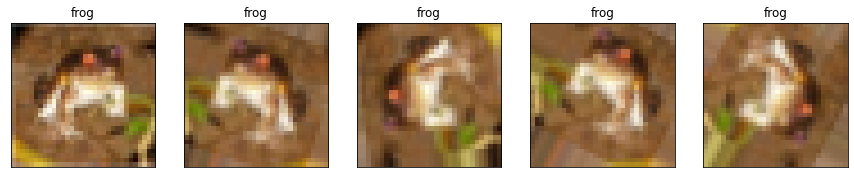

In [15]:
# show the first train images and their augmented iamges
classes = ["airplane","automobile", "bird", "cat", "deer",
          "dog", "frog", "horse", "ship", "truck"]
fig, axs = plt.subplots(1,5, figsize=(15,15))
for i in range(5):
    if i == 0:
        axs[i].imshow(x_train[i])
    else:
         axs[i].imshow(img_gen.random_transform(x_train[0]))
    axs[i].set_title(classes[y_train[0][0]])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

# Try to play with data augmentation and use it to improve our classification model!